#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

#### Dataset from Kaggle : https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

#### Reading the file

In [2]:
dataset = pd.read_csv('churn.csv.txt')
dataset.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
dataset.isnull().sum()        # there is no missing value

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [4]:
dataset.describe()   
# There is a lot of difference in standard deviations. We would need to scale the features.
# But Tree models do not need feature scaling

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# Here we are finding correlation of some customer data

data = dataset[['VMail Message', 'Day Calls', 'Eve Calls', 'Night Calls', 'Intl Calls', 'CustServ Calls']]
corr = data.corr()
corr

,VMail Message,Day Calls,Eve Calls,Night Calls,Intl Calls,CustServ Calls
VMail Message,1.000000,-0.009548,-0.005864,0.007123,0.013957,-0.013263
Day Calls,-0.009548,1.000000,0.006462,-0.019557,0.004574,-0.018942
Eve Calls,-0.005864,0.006462,1.000000,0.007710,0.017434,0.002423
Night Calls,0.007123,-0.019557,0.007710,1.000000,0.000305,-0.012802
Intl Calls,0.013957,0.004574,0.017434,0.000305,1.000000,-0.017561
CustServ Calls,-0.013263,-0.018942,0.002423,-0.012802,-0.017561,1.000000


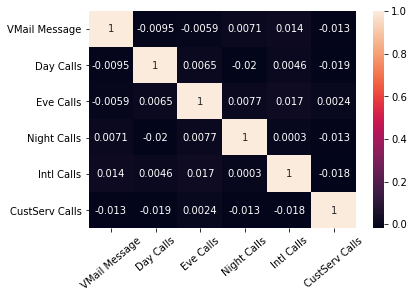

In [6]:
sns.heatmap(corr, annot=True)
plt.xticks(rotation=40)
plt.show()

## EDA

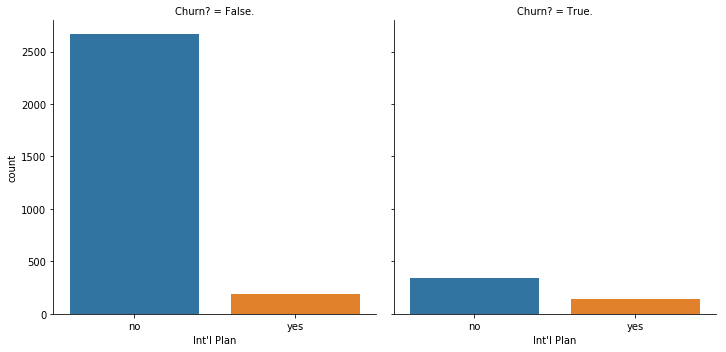

In [7]:
sns.catplot(x="Int'l Plan", col='Churn?', kind='count', data=dataset)
plt.show()

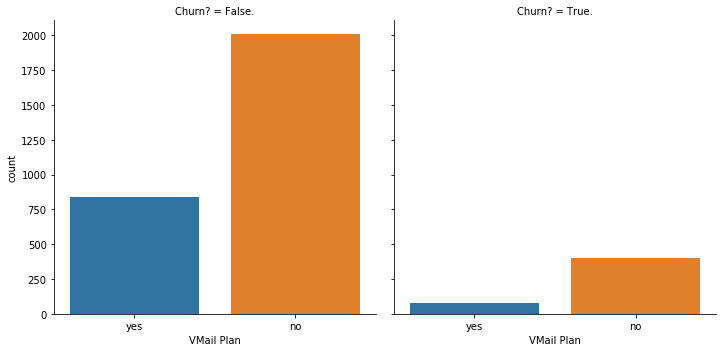

In [8]:
sns.catplot(x="VMail Plan", col='Churn?', kind='count', data=dataset)
plt.show()

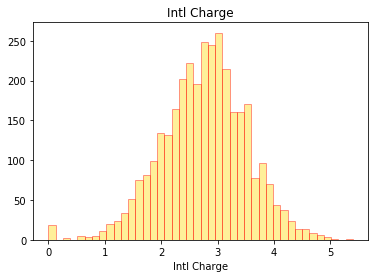

In [9]:
sns.distplot(dataset['Intl Charge'], color='gold', kde=False, hist_kws={'edgecolor':'red'})
plt.title('Intl Charge')
plt.show()

## Feature Engineering

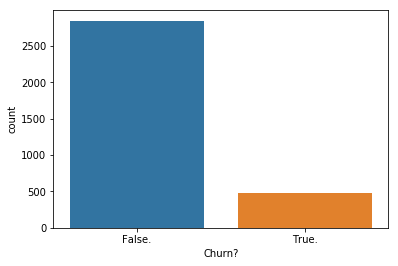

False.    2850
True.      483
Name: Churn?, dtype: int64


In [10]:
sns.countplot(x='Churn?', data=dataset)
plt.show()

print(dataset['Churn?'].value_counts())

#### As we can see that the dataset is imbalanced. The number of customer churn is aproximately 1/6 of the dataset to the customer did not churn is approximately 5/6 of the dataset.

In [11]:
dataset.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [12]:
dataset = dataset.drop('Phone', axis=1)        # Here we drop 'Phone' column, its not useful for prediction 

In [13]:
dataset = dataset.drop('State', axis=1)     # Also dropping 'State' column

In [14]:
# Now we create the dummy var. for categorical columns

dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Int'l Plan_yes,VMail Plan_yes,Churn?_True.
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
Account Length    3333 non-null int64
Area Code         3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Int'l Plan_yes    3333 non-null uint8
VMail Plan_yes    3333 non-null uint8
Churn?_True.      3333 non-null uint8
dtypes: float64(8), int64(8), uint8(3)
memory usage: 426.5 KB


## Decision Tree

In [16]:
X = dataset.drop('Churn?_True.', axis=1)

In [17]:
y = dataset['Churn?_True.'].values

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_one = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=101, min_samples_leaf=3, class_weight='balanced')
tree_one

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [20]:
tree_one = tree_one.fit(X_train, y_train)

In [21]:
list(zip(X_train.columns, tree_one.feature_importances_))   # it joins all feature importance with each columns

[('Account Length', 0.0),
 ('Area Code', 0.0),
 ('VMail Message', 0.0),
 ('Day Mins', 0.07035925346024363),
 ('Day Calls', 0.0),
 ('Day Charge', 0.25571711403649733),
 ('Eve Mins', 0.026854865566740715),
 ('Eve Calls', 0.0),
 ('Eve Charge', 0.0),
 ('Night Mins', 0.0),
 ('Night Calls', 0.0),
 ('Night Charge', 0.0),
 ('Intl Mins', 0.0),
 ('Intl Calls', 0.0),
 ('Intl Charge', 0.0),
 ('CustServ Calls', 0.32081024502636246),
 ("Int'l Plan_yes", 0.2837065401708022),
 ('VMail Plan_yes', 0.04255198173935369)]

#### We can see that 'CustServ Calls' is a important parameter in the model while predicting whether customer stay or churn away from the existing telecom provider. Also 'Day Charge' and "Int'l Plan_yes" are important.

In [22]:
print('Accuracy on Train data :', tree_one.score(X_train, y_train))
print('Accuracy on Train data :', tree_one.score(X_test, y_test))

Accuracy on Train data : 0.8585512216030862
Accuracy on Train data : 0.861


#### We can see that the model is not over fitted because the accuracy score of train and test data are close to each other. Whereas, the model is performing better with test data because it's accuracy score is better than the train data.

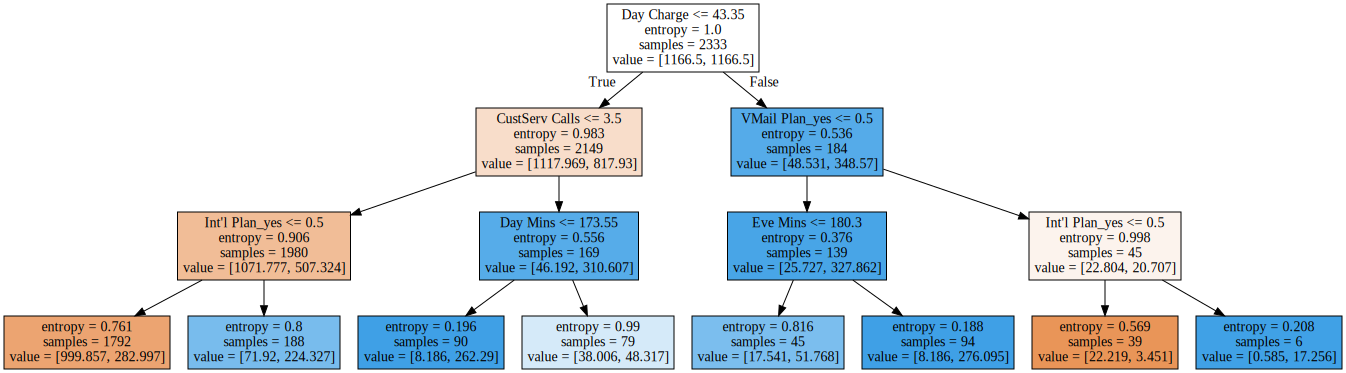

In [23]:
from graphviz import Source
from sklearn.tree import export_graphviz

with open('tree.dot', 'w') as dotfile:
    export_graphviz(tree_one, out_file=dotfile, feature_names=X_train.columns, filled=True)
    dotfile.close()
    
with open('tree.dot', 'r') as f:
    text = f.read()
    plot = Source(text)

plot

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = tree_one.predict(X_test)

cf = confusion_matrix(y_test, y_pred)
cf

array([[747, 108],
       [ 31, 114]], dtype=int64)

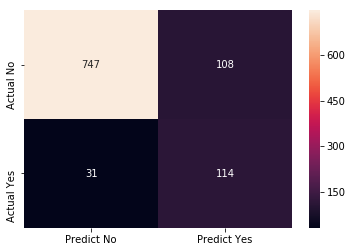

In [25]:
sns.heatmap(cf, annot=True, xticklabels=['Predict No', 'Predict Yes'], yticklabels=['Actual No', 'Actual Yes'], fmt='d')

## Hyperparameter tuning

In [26]:
tree_two = DecisionTreeClassifier(max_depth=10, min_samples_split=5, criterion='gini', random_state=101,
                                  class_weight='balanced')
tree_two.fit(X_train, y_train)

print('2nd Tree Accuracy on training : ', tree_two.score(X_train, y_train))
print('2nd Tree Accuracy on testing : ', tree_two.score(X_test, y_test))

2nd Tree Accuracy on training :  0.9781397342477497
2nd Tree Accuracy on testing :  0.933


#### We have improved our model by fine tuning the parameters.This is called Hyperparameter tuning.

As we can see that the variation between the train and test data is significant. 
So, we can infer that our model is suffering from the overfitting. Though the accuracy score 
is better than the previous model ( tree_one ). It mainly because of the hyperparmater i.e. 
the increase in the max_depth, min_sample split due to which it become too much attached to training data 
and increases the level of complexity. Instead of being generic model it become more centric 
to specific conditions as we increases the number of levels.

In [27]:
print('Acuuracy of Tree 1 :', tree_one.score(X_test, y_test))      # tree_one  on  test set  , similarly checck for train set
print('Acuuracy of Tree 2 :', tree_two.score(X_test, y_test))     # tree_two  on test set

Acuuracy of Tree 1 : 0.861
Acuuracy of Tree 2 : 0.933


In [28]:
# Building the Confusion matrix of our improved model

pred2 = tree_two.predict(X_test)

cf2 = confusion_matrix(y_test, pred2)
cf2

array([[820,  35],
       [ 32, 113]], dtype=int64)

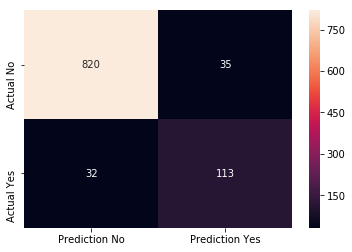

In [29]:
sns.heatmap(cf2, annot=True, xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], fmt='d')

### Random forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=10, random_state=101, class_weight='balanced')

forest = forest.fit(X_train, y_train)

In [31]:
print('Accuracy on train set of RF : ', forest.score(X_train, y_train))
print('Accuracy on test set of RF : ', forest.score(X_test, y_test))

Accuracy on train set of RF :  0.9845692241748821
Accuracy on test set of RF :  0.951


In [32]:
pred_forest = forest.predict(X_test)

In [33]:
list(zip(X_train.columns, forest.feature_importances_))

[('Account Length', 0.030816823122085068),
 ('Area Code', 0.006995009556977227),
 ('VMail Message', 0.02375027480571948),
 ('Day Mins', 0.13093539018119058),
 ('Day Calls', 0.02987876109595428),
 ('Day Charge', 0.14807882734553993),
 ('Eve Mins', 0.05560547270322508),
 ('Eve Calls', 0.03144120611299737),
 ('Eve Charge', 0.05808526407436264),
 ('Night Mins', 0.03501769809967184),
 ('Night Calls', 0.03276261684010481),
 ('Night Charge', 0.03704150233694261),
 ('Intl Mins', 0.044204633848210564),
 ('Intl Calls', 0.03541654694378157),
 ('Intl Charge', 0.039148691148351594),
 ('CustServ Calls', 0.16008336966243658),
 ("Int'l Plan_yes", 0.08432944544134462),
 ('VMail Plan_yes', 0.016408466681104218)]

In [34]:
cf_forest = confusion_matrix(y_test, pred_forest)
cf_forest

array([[844,  11],
       [ 38, 107]], dtype=int64)

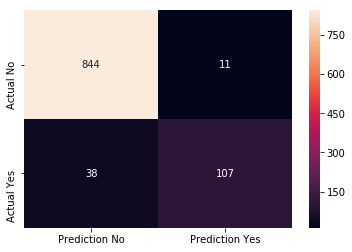

In [35]:
sns.heatmap(cf_forest, annot=True, xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], fmt='d')

## GridSearch CV

#### Grid-search : is the process of scanning the data to configure optimal parameters for a given model.
#### Cross-validation : tells how well a model performs on a dataset using multiple samples of train data.

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Applying GridSearch on Decision Tree

max_depth=[5,10,15]
criterion = ['gini', 'entropy']
min_samples_split = [5,10,15]

tree_three = DecisionTreeClassifier(class_weight='balanced')

grid = GridSearchCV(estimator=tree_three, cv=3,
                    param_grid=dict(max_depth=max_depth, criterion=criterion, min_samples_split=min_samples_split), verbose=2)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=gini, max_depth=5, min_samples_split=5 ................
[CV] . criterion=gini, max_depth=5, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=5 ................
[CV] . criterion=gini, max_depth=5, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=5 ................
[CV] . criterion=gini, max_depth=5, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=10 ...............
[CV]  criterion=gini, max_depth=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=10 ...............
[CV]  criterion=gini, max_depth=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=10 ...............
[CV]  criterion=gini, max_depth=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_split=15 ...............
[CV]  criterion=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, min_samples_split=15, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=5 ...............
[CV]  criterion=gini, max_depth=10, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=5 ...............
[CV]  criterion=gini, max_depth=10, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=5 ...............
[CV]  criterion=gini, max_depth=10, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=10 ..............
[CV]  criterion=gini, max_depth=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=10 ..............
[CV]  criterion=gini, max_depth=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=10 ..............
[CV]  criterion=gini, max_depth=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=15 ..............
[CV

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy'], 'min_samples_split': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [38]:
print('Average accuracy score : ', grid.best_score_)

Average accuracy score :  0.921988855550793


In [39]:
grid.best_estimator_      # all best estimators of model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
grid.best_params_     # best parameters for the model

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}

In [41]:
# Building the model based on new parameters

tree_three = DecisionTreeClassifier(criterion='entropy', max_depth = 10, min_samples_split= 5, class_weight='balanced', 
                                    random_state=42)

tree_three = tree_three.fit(X_train, y_train)

print('Accuracy of tree 3 model : ', tree_three.score(X_train, y_train))

Accuracy of tree 3 model :  0.9515645092156022


In [42]:
print('Accuracy of tree 1 model : ', tree_one.score(X_train, y_train))
print('Accuracy of tree 2 model : ', tree_two.score(X_train, y_train))    # criterion='gini' 
print('Accuracy of tree 3 model : ', tree_three.score(X_train, y_train))

Accuracy of tree 1 model :  0.8585512216030862
Accuracy of tree 2 model :  0.9781397342477497
Accuracy of tree 3 model :  0.9515645092156022


## Randomized Search CV

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [45]:
forest_two = RandomForestClassifier(class_weight='balanced')

random_rf = RandomizedSearchCV(estimator=forest_two, param_distributions=random_grid, n_iter=100, cv=3, random_state=42,
                               verbose=2)     # Fitting 3 folds for each of 100 candidates, totalling 300 fits

random_rf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.3s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.2s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_sa

[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   3.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.7s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimato

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.0s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.9s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.0s
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   4.7s
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=733,

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.8s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   4.0s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.8s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.7s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, mi

[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   5.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.4s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=288, min

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.9s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.8s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   4.0s
[CV] n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   3.3s
[CV] n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=733, min_sampl

[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   3.4s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   3.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   6.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   6.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   0.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   6.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   7.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   6.1s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=377

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   6.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   7.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   6.2s
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   2.0s
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 17.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [46]:
random_rf.best_score_

0.9438491213030433

In [47]:
random_rf.best_params_      # Use the best parameters, build the Random forest model , as earlier.

{'n_estimators': 466,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [48]:
forest_two = RandomForestClassifier(class_weight='balanced', n_estimators= 466, min_samples_split= 10, min_samples_leaf=2, 
                                    max_features='sqrt', max_depth= 20, bootstrap= False)

forest_two = forest_two.fit(X_train, y_train)

print('Accuracy of Random forest 2nd model : ', forest_two.score(X_train, y_train))

Accuracy of Random forest 2nd model :  0.9961423060437206


In [49]:
print('Accuracy of Random forest 1st model : ', forest.score(X_train, y_train))
print('Accuracy of Random forest 2nd model : ', forest_two.score(X_train, y_train))

Accuracy of Random forest 1st model :  0.9845692241748821
Accuracy of Random forest 2nd model :  0.9961423060437206
